In [84]:
from __future__ import division
from IPython.display import Audio
import numpy as np
import scipy as scp
import pylab as pyl
from matplotlib import cm
import matplotlib.pyplot as plt
import pywt
import scipy.io as sio
from scipy import fftpack
from matplotlib.pyplot import imshow as imageplot
from mpl_toolkits.mplot3d import Axes3D
import wave
import warnings
from scipy.io.wavfile import read
warnings.filterwarnings('ignore')

In [85]:
def Analyse(S,N):
    NS=len(S)
    print(NS)
    Nf=8*NS//N-7
    Spec=np.zeros((N,Nf))
    Phase=np.zeros((N,Nf))
    H=np.hanning(N)
    for i in range(Nf):
        temp=H*S[i*N//8:(i+8)*N//8]
        ftemp=np.fft.fft(temp)
        Spec[:,i]=np.abs(ftemp)
        Phase[:,i]=np.angle(ftemp)
    return Spec,Phase

In [86]:
def Synthese(Spec,Phase):
    N=Spec.shape[0]
    Nf=Spec.shape[1]
    Srec=np.zeros((Nf+7)*N//8)
    H=np.hanning(N)
    for k in range(Nf):
        ftemp=Spec[:,k]*np.exp(1j*Phase[:,k])
        temp=np.real(np.fft.ifft(ftemp))
        Srec[k*N//8:(k+8)*N//8]=Srec[k*N//8:(k+8)*N//8]+H*temp
    Srec=Srec/4
    return Srec

In [87]:
def Splot(S1,S2):
    t=np.linspace(0,len(S1[0])/V1[0],len(S1[0]))
    f, axarr = plt.subplots(2)
    axarr[1].plot(t,S1)
    axarr[1].set_title("S out 1")
    axarr[2].plot(t,S1)
    axarr[2].set_title("S out 2")
    plt.show()

In [88]:
def Separation(Spec1,Spec2,T):
    (Nf,Nt)=Spec1.shape
    Spec4=np.zeros(Spec1.shape)
    Spec3=np.zeros(Spec1.shape)
    for i in range(Nf):
        for j in range(Nt):
            if Spec1[i,j]>=T*Spec2[i,j]:
                Spec4[i,j]=Spec1[i,j]
            else:
                Spec3[i,j]=Spec2[i,j]
    return (Spec3,Spec4)

In [89]:
def TFCourtTerme(Son,N,rec):
    H=np.hanning(N)
    NS=len(Son)
    Nf=int(np.floor(rec*NS/N)-rec+1)
    TF=np.zeros((N,Nf),dtype=complex)
    for k in range(0,Nf):
        d=int(k*N/rec)
        f=d+N
        TF[:,k]=fftpack.fft(Son[d:f]*H)
    return TF

In [90]:
rec=8
N=1024
V1 = read("./2 instruments/Mix11.wav")
V2 = read("./2 instruments/Mix21.wav")
TFCT1=TFCourtTerme(V1[1],N,rec)
TFCT2=TFCourtTerme(V2[1],N,rec)

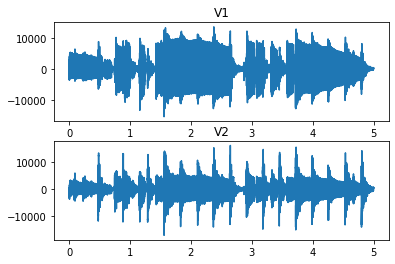

In [91]:
V1 = read("./2 instruments/Mix11.wav")
V2 = read("./2 instruments/Mix21.wav")
TFCT1=TFCourtTerme(V1[1],N,rec)
TFCT2=TFCourtTerme(V2[1],N,rec)

t=np.linspace(0,len(V1[1])/V1[0],len(V1[1]))
f, axarr = plt.subplots(2)
axarr[0].plot(t,V1[1])
axarr[0].set_title("V1")
axarr[1].plot(t,V2[1])
axarr[1].set_title("V2")
plt.show()

220500
220500


ValueError: x and y must have same first dimension, but have shapes (1024,) and (220416,)

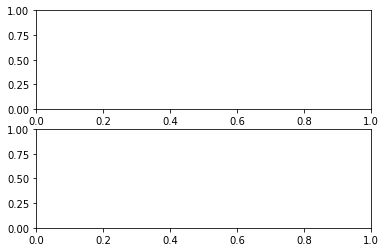

In [94]:
R=np.array([.5,2.])
R1=np.sort(R)
T=np.zeros(len(R1)-1)
#
SI1,P1=Analyse(V1[1],1024)
SI2,P2=Analyse(V2[1],1024)
for i in range(len(R1)-1):
    T[i]=np.sqrt(R1[i]*R1[i+1])
SO1,SO2=Separation(SI1,SI2,T)
#
RS1 = Synthese(SO1,P1)
RS2 = Synthese(SO2,P2)
t=np.linspace(0,len(SO1)/V1[0],len(SO1))
f, axarr = plt.subplots(2)
axarr[0].plot(t,RS1)
axarr[0].set_title("SO1")
axarr[1].plot(t,RS2)
axarr[1].set_title("SO2")

